### Regression Models Comparison

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

#Preprocessing/Spliting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

#stats
from scipy.stats import norm, skew
from pandas.api.types import is_numeric_dtype

np.set_printoptions(precision=3)
pd.set_option('precision', 3)
%matplotlib inline

In [6]:
# Loading data
df = pd.read_csv("norm01.data.csv")  
df = df.iloc[: , 1:]
df

,cylinders,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3,origin,car name,brand,mpg_scaled,cylinders_str,origin_str
0,8,0.618,0.457,0.536,0.238,0.0,1,0.239,1,0,0,1,chevrolet chevelle malibu,chevrolet,0.239,8,1
1,8,0.729,0.647,0.590,0.208,0.0,1,0.160,1,0,0,1,buick skylark 320,buick,0.160,8,1
2,8,0.646,0.565,0.517,0.179,0.0,1,0.239,1,0,0,1,plymouth satellite,plymouth,0.239,8,1
3,8,0.610,0.565,0.516,0.238,0.0,1,0.186,1,0,0,1,amc rebel sst,amc,0.186,8,1
4,8,0.605,0.511,0.521,0.149,0.0,1,0.213,1,0,0,1,ford torino,ford,0.213,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,0.186,0.217,0.334,0.452,1.0,0,0.479,1,0,0,1,ford mustang gl,ford,0.479,4,1
394,4,0.075,0.033,0.147,0.988,1.0,0,0.931,0,1,0,2,vw pickup,volkswagen,0.931,4,2
395,4,0.173,0.207,0.193,0.214,1.0,0,0.612,1,0,0,1,dodge rampage,dodge,0.612,4,1
396,4,0.134,0.179,0.287,0.631,1.0,0,0.505,1,0,0,1,ford ranger,ford,0.505,4,1


In [ ]:
#Του cylinders / getdummies

In [7]:
df = pd.get_dummies(df, columns=['cylinders'])

In [8]:
df

,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3,origin,car name,brand,mpg_scaled,cylinders_str,origin_str,cylinders_4,cylinders_6,cylinders_8
0,0.618,0.457,0.536,0.238,0.0,1,0.239,1,0,0,1,chevrolet chevelle malibu,chevrolet,0.239,8,1,0,0,1
1,0.729,0.647,0.590,0.208,0.0,1,0.160,1,0,0,1,buick skylark 320,buick,0.160,8,1,0,0,1
2,0.646,0.565,0.517,0.179,0.0,1,0.239,1,0,0,1,plymouth satellite,plymouth,0.239,8,1,0,0,1
3,0.610,0.565,0.516,0.238,0.0,1,0.186,1,0,0,1,amc rebel sst,amc,0.186,8,1,0,0,1
4,0.605,0.511,0.521,0.149,0.0,1,0.213,1,0,0,1,ford torino,ford,0.213,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.186,0.217,0.334,0.452,1.0,0,0.479,1,0,0,1,ford mustang gl,ford,0.479,4,1,1,0,0
394,0.075,0.033,0.147,0.988,1.0,0,0.931,0,1,0,2,vw pickup,volkswagen,0.931,4,2,1,0,0
395,0.173,0.207,0.193,0.214,1.0,0,0.612,1,0,0,1,dodge rampage,dodge,0.612,4,1,1,0,0
396,0.134,0.179,0.287,0.631,1.0,0,0.505,1,0,0,1,ford ranger,ford,0.505,4,1,1,0,0


## Splitting

In [9]:
source = df[['weight','horsepower','displayments','cylinders_4','cylinders_6','cylinders_8','cluster','origin_1','origin_2','origin_3','acceleration']]

In [10]:
target = df['mpg']

In [11]:
if len(source.values.shape)==1:
     X = source.values.reshape(-1,1)
    
else:
     X = source.values 

In [12]:
y = target.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

Model Evaluation
The In Sample R2 Score: 0.7437218935164895
The In Sample RMSE: 0.10660770537831755

The Out Sample R2 Score: 0.7414410141833526
The Out Sample RMSE: 0.09916253690248968


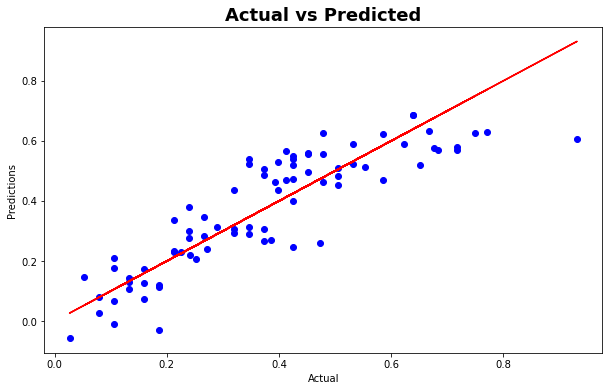

In [17]:
reg = LinearRegression()

#fit 
reg.fit(X_train, y_train)

#predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#Evaluation
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
reg_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {reg_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
reg_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {reg_out_rmse}")


#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation
The In Sample R2 Score: 0.7366133421207723
The In Sample RMSE: 0.10807611585967973

The Out Sample R2 Score: 0.748208125926296
The Out Sample RMSE: 0.09785627193087626


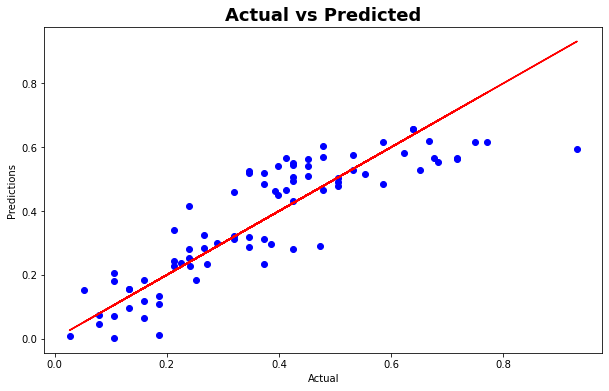

In [18]:
ridge = Ridge()

# fit
ridge.fit(X_train, y_train)

#predict
in_preds = ridge.predict(X_train)
out_preds = ridge.predict(X_test)

#evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
ridge_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {ridge_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
ridge_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {ridge_out_rmse}")


#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.0
The In Sample RMSE: 0.21058762295342603

The Out Sample R2 Score: -0.00403326341807686
The Out Sample RMSE: 0.19540778489338478


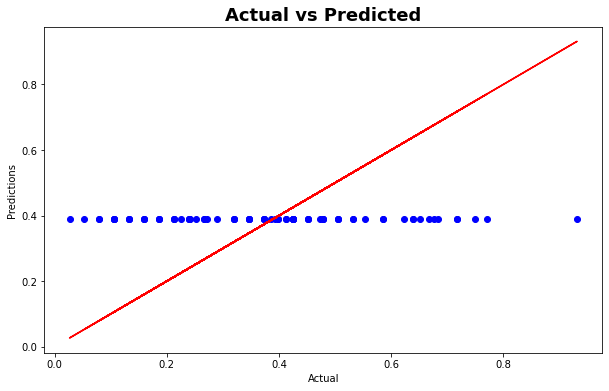

In [19]:
lasso = Lasso()

#fit
lasso.fit(X_train, y_train)

#predict
in_preds = lasso.predict(X_train)
out_preds = lasso.predict(X_test)

#Evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
lasso_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {lasso_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
lasso_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {lasso_out_rmse}")


#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.0
The In Sample RMSE: 0.21058762295342603

The Out Sample R2 Score: -0.00403326341807686
The Out Sample RMSE: 0.19540778489338478


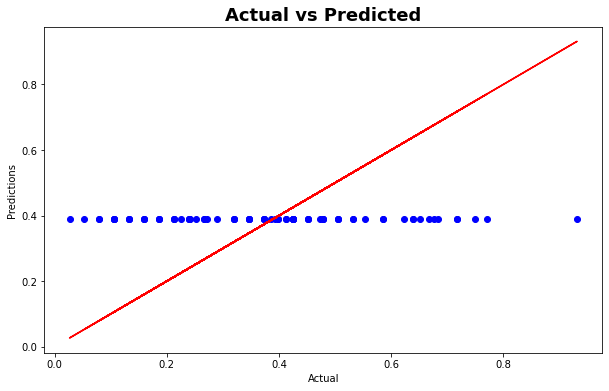

In [21]:
elastic = ElasticNet()

#fit
elastic.fit(X_train, y_train)

#predict
in_preds = elastic.predict(X_train)
out_preds = elastic.predict(X_test)

#Evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
en_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {en_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
en_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {en_out_rmse}")


#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## Decision Tree Regression

Model Evaluation Report
The In Sample R2 Score: 0.9997742935245364
The In Sample RMSE: 0.003163769623875576

The Out Sample R2 Score: 0.6395149344427304
The Out Sample RMSE: 0.11708774707914837


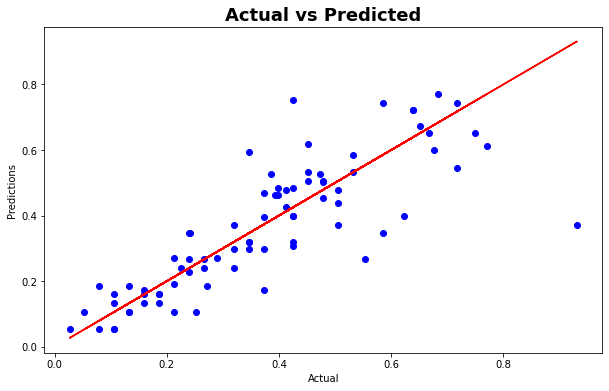

In [23]:
dectree = DecisionTreeRegressor()

#fit
dectree.fit(X_train, y_train)

#predict
in_preds = dectree.predict(X_train)
out_preds = dectree.predict(X_test)

#evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
dt_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {dt_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
dt_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {dt_out_rmse}")

#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## Random Forest Regressor

Model Evaluation Report
The In Sample R2 Score: 0.9682714233219899
The In Sample RMSE: 0.037510956428409424

The Out Sample R2 Score: 0.7785143270704044
The Out Sample RMSE: 0.09177843131286165


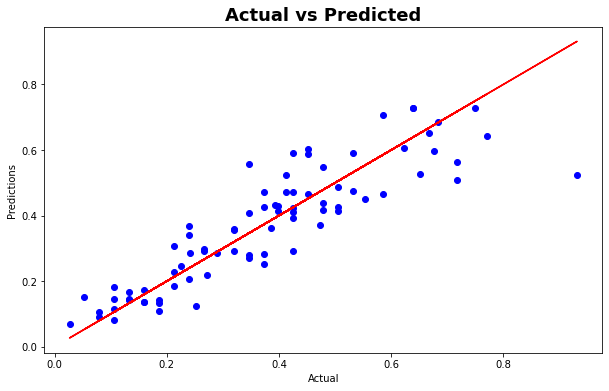

In [24]:
randfor = RandomForestRegressor()

# fit
randfor.fit(X_train, y_train)

# predict
in_preds = randfor.predict(X_train)
out_preds = randfor.predict(X_test)

#evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
rf_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {rf_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
rf_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {rf_out_rmse}")

#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## AdaBoost

Model Evaluation Report
The In Sample R2 Score: 0.834884919156587
The In Sample RMSE: 0.08557092235313765

The Out Sample R2 Score: 0.7497739641686137
The Out Sample RMSE: 0.09755152409417552


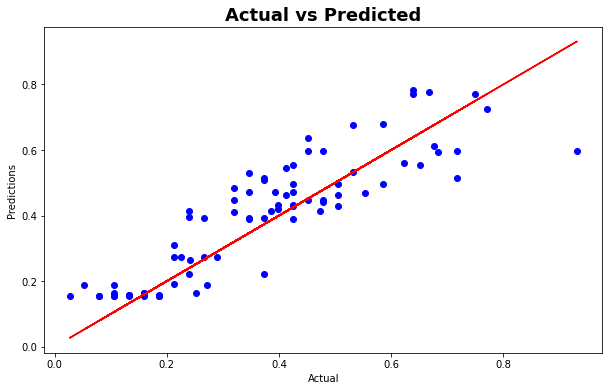

In [26]:
ada = AdaBoostRegressor()

#fit
ada.fit(X_train, y_train)

#predict
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

#Evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
ada_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {ada_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
ada_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {ada_out_rmse}")

#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## Gradient Boosting

Model Evaluation Report
The In Sample R2 Score: 0.9430685495385166
The In Sample RMSE: 0.05024686457073307

The Out Sample R2 Score: 0.754128996440546
The Out Sample RMSE: 0.09669888536244126


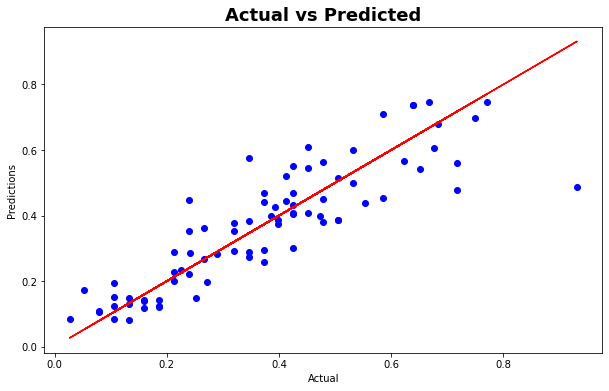

In [27]:
gb = GradientBoostingRegressor()

# fit
gb.fit(X_train, y_train)

# predict
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

#evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
gb_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {gb_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
gb_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {gb_out_rmse}")

#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## Model Selection

In [28]:
model_names = ["LINEAR","RIDGE","LASSO","ELASTICNET","DECISION TREE","RANDOM FR","ADA BOOTS","GRADIENT BOOSTING"]

models = {"Model":model_names,
          "IN SAMPLE RMSE":[reg_in_rmse, ridge_in_rmse, lasso_in_rmse, en_in_rmse, dt_in_rmse, rf_in_rmse, ada_in_rmse, gb_in_rmse],
          "OUT SAMPLE RMSE":[reg_out_rmse, ridge_out_rmse, lasso_out_rmse, en_out_rmse, dt_out_rmse, rf_out_rmse, ada_out_rmse, gb_out_rmse]}

model_performance = pd.DataFrame(models)

model_performance.sort_values(by = "OUT SAMPLE RMSE",kind='quicksort', ascending=True).style.background_gradient(cmap='YlOrRd')

,Model,IN SAMPLE RMSE,OUT SAMPLE RMSE
5,RANDOM FR,0.038,0.092
7,GRADIENT BOOSTING,0.050,0.097
6,ADA BOOTS,0.086,0.098
1,RIDGE,0.108,0.098
0,LINEAR,0.107,0.099
4,DECISION TREE,0.003,0.117
2,LASSO,0.211,0.195
3,ELASTICNET,0.211,0.195


## Final Model from this methods (Random Forest Regressor)

Model Evaluation
The In Sample R2 Score: 0.9689443549982836
The In Sample RMSE: 0.03658641264119167



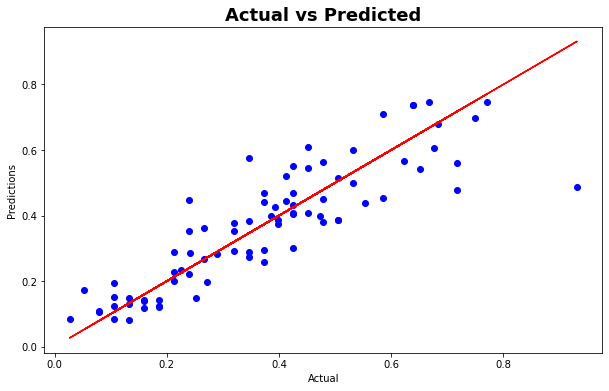

In [29]:
randfor_last = RandomForestRegressor()

# fit
randfor_last.fit(X, y)

#predict
in_preds = randfor_last.predict(X)

#evaluate
print("Model Evaluation")
print(f"The In Sample R2 Score: {r2_score(y, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y, in_preds))}")
print()

#Plot Results
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

In [31]:
feature_imp = pd.DataFrame(list(zip(source.columns, randfor_last.feature_importances_)), columns=["Feature", "Importance"])
feature_imp.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,displayments,4.188e-01
0,weight,2.009e-01
1,horsepower,1.798e-01
6,cluster,7.667e-02
10,acceleration,6.217e-02
3,cylinders_4,4.276e-02
9,origin_3,7.351e-03
8,origin_2,5.282e-03
4,cylinders_6,3.082e-03
7,origin_1,2.872e-03


In [33]:
#Testing the Model over the whole dataset
results = pd.DataFrame({'Label mpg': target,
'Prediction': randfor_last.predict(X)})
results

,Label mpg,Prediction
0,0.239,0.221
1,0.160,0.147
2,0.239,0.217
3,0.186,0.198
4,0.213,0.216
...,...,...
393,0.479,0.462
394,0.931,0.813
395,0.612,0.616
396,0.505,0.502
